<div style="font-family: 'Arial', sans-serif; background-color:rgb(48, 15, 123); padding: 15px; border-radius: 8px;">
  <!-- Notebook Header Section -->
  <div style="background-color:rgb(167, 20, 20); color: white; padding: 20px; border-radius: 8px;">
    <h1 style="text-align: center; font-size: 2.5rem; font-weight: bold">Data Science Salaries 2023 💸</h1>
    <p style="text-align: center; font-size: 1.1rem;">Created by <strong>Ahmed Saqr</strong> </p> 
  </div>
</div>

<div style="font-family: Arial, Helvetica, sans-serif; background-color: rgb(48, 15, 123); padding: 15px; border-radius: 8px;">
    <!-- Introduction/Overview Section -->
    <div style="background-color: rgb(167, 20, 20); color: white; padding: 20px; border-radius: 8px;">
        <div style="margin-top: 30px;">
            <h2 aria-label="Dataset Overview" style="font-size: 1.6rem;font-weight: bold;">🎇 Data Attributes:</h2>
            <p style="font-size: 1.1rem;">
                Data Science Job Salaries Dataset contains 11 columns, each are:
            </p>
            <ul style="font-size: 1.1rem;">
                <li><strong>work_year</strong> - The year the salary was paid.</li>
                <li><strong>experience_level</strong> - The experience level in the job during the year.</li>
                <li><strong>employment_type</strong> - The type of employment for the role.</li>
                <li><strong>job_title</strong> - The role worked in during the year.</li>
                <li><strong>salary</strong> - The total gross salary amount paid.</li>
                <li><strong>salary_currency</strong> - The currency of the salary paid as an ISO 4217 currency code.</li>
                <li><strong>salaryinusd</strong> - The salary in USD.</li>
                <li><strong>employee_residence</strong> - Employee's primary country of residence in during the work year as an ISO 3166 country code.</li>
                <li><strong>remote_ratio</strong> - The overall amount of work done remotely.</li>
                <li><strong>company_location</strong> - The country of the employer's main office or contracting branch.</li>
                <li><strong>company_size</strong> - The median number of people that worked for the company during the year.</li>
                <!-- Add more features as needed -->
            </ul>
        </div>
    </div>
</div>

<img src="https://365datascience.com/resources/blog/thumb@1024_nzrlm8mbzn-average-data-science-salaries-in-europe.webp" alt="Paris" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 70%;"> 

<div style="font-family: 'Arial', sans-serif; background-color: rgb(48, 15, 123); padding: 15px; border-radius: 8px;">
  <!-- Notebook Header Section -->
  <div style="background-color: rgb(167, 20, 20); color: white; padding: 15px; border-radius: 8px;">
    <h1 style="text-align: center; font-size: 2.5rem; font-weight: bold;">Importing Necessary libraries</h1>
  </div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import warnings
warnings.filterwarnings('ignore')

<div style="font-family: 'Arial', sans-serif; background-color: rgb(48, 15, 123); padding: 15px; border-radius: 8px;">
  <!-- Notebook Header Section -->
  <div style="background-color: rgb(167, 20, 20); color: white; padding: 15px; border-radius: 8px;">
    <h1 style="text-align: center; font-size: 2.5rem; font-weight: bold;">Loading the dataset</h1>
  </div>
</div>

In [2]:
df = pd.read_csv("data/ds_salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


<div style="font-family: 'Arial', sans-serif; background-color: rgb(48, 15, 123); padding: 15px; border-radius: 8px;">
  <!-- Notebook Header Section -->
  <div style="background-color: rgb(167, 20, 20); color: white; padding: 15px; border-radius: 8px;">
    <h1 style="text-align: center; font-size: 2.5rem; font-weight: bold;">Check of Data</h1>
  </div>
</div>

In [4]:
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  3755
Number of Columns:  11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.duplicated().sum()

1171

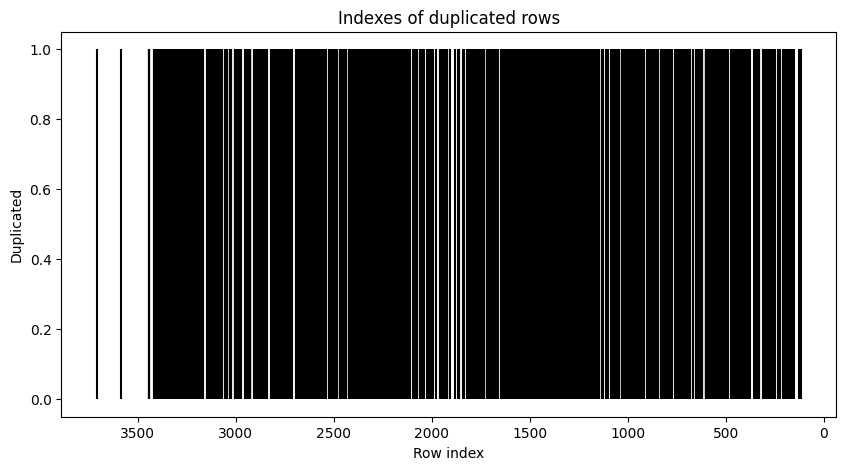

In [8]:
duplicated_rows = pd.DataFrame({
    'duplicated': df.duplicated(),
    'row': range(1, len(df) + 1)
})


duplicated_rows = duplicated_rows[duplicated_rows['duplicated']]

plt.figure(figsize=(10, 5))
plt.vlines(duplicated_rows['row'], ymin=0, ymax=1, colors='black')
plt.gca().invert_xaxis()
plt.title('Indexes of duplicated rows')
plt.xlabel('Row index')
plt.ylabel('Duplicated')
plt.show()

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print("The new number of rows after removing duplicates: ", df.shape[0])
print("The new number of columns after removing duplicates: ", df.shape[1])

The new number of rows after removing duplicates:  2584
The new number of columns after removing duplicates:  11


<div style="font-family: 'Arial', sans-serif; background-color: rgb(48, 15, 123); padding: 15px; border-radius: 8px;">
  <!-- Notebook Header Section -->
  <div style="background-color: rgb(167, 20, 20); color: white; padding: 15px; border-radius: 8px;">
    <h1 style="text-align: center; font-size: 2.5rem; font-weight: bold;">Exploratory data analysis (EDA)</h1>
  </div>
</div>

In [11]:
des = df.describe().transpose()
des.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
work_year,2584.000000,2022.301084,0.749179,2020.000000,2022.000000,2022.000000,2023.000000,2023.000000
salary,2584.000000,210365.296440,808037.535609,6000.000000,90000.000000,134630.000000,182562.500000,30400000.000000
salary_in_usd,2584.000000,133409.280186,67136.837329,5132.000000,84975.000000,130000.000000,175000.000000,450000.000000
remote_ratio,2584.000000,50.483746,48.163707,0.000000,0.000000,50.000000,100.000000,100.000000


In [12]:
work_year_count = df["work_year"].value_counts()

fig = px.pie(names=work_year_count.index, values=work_year_count.values, 
             labels=work_year_count.index, title="Work Year Distribution")

fig.update_traces(textposition="inside", textinfo="percent+label")

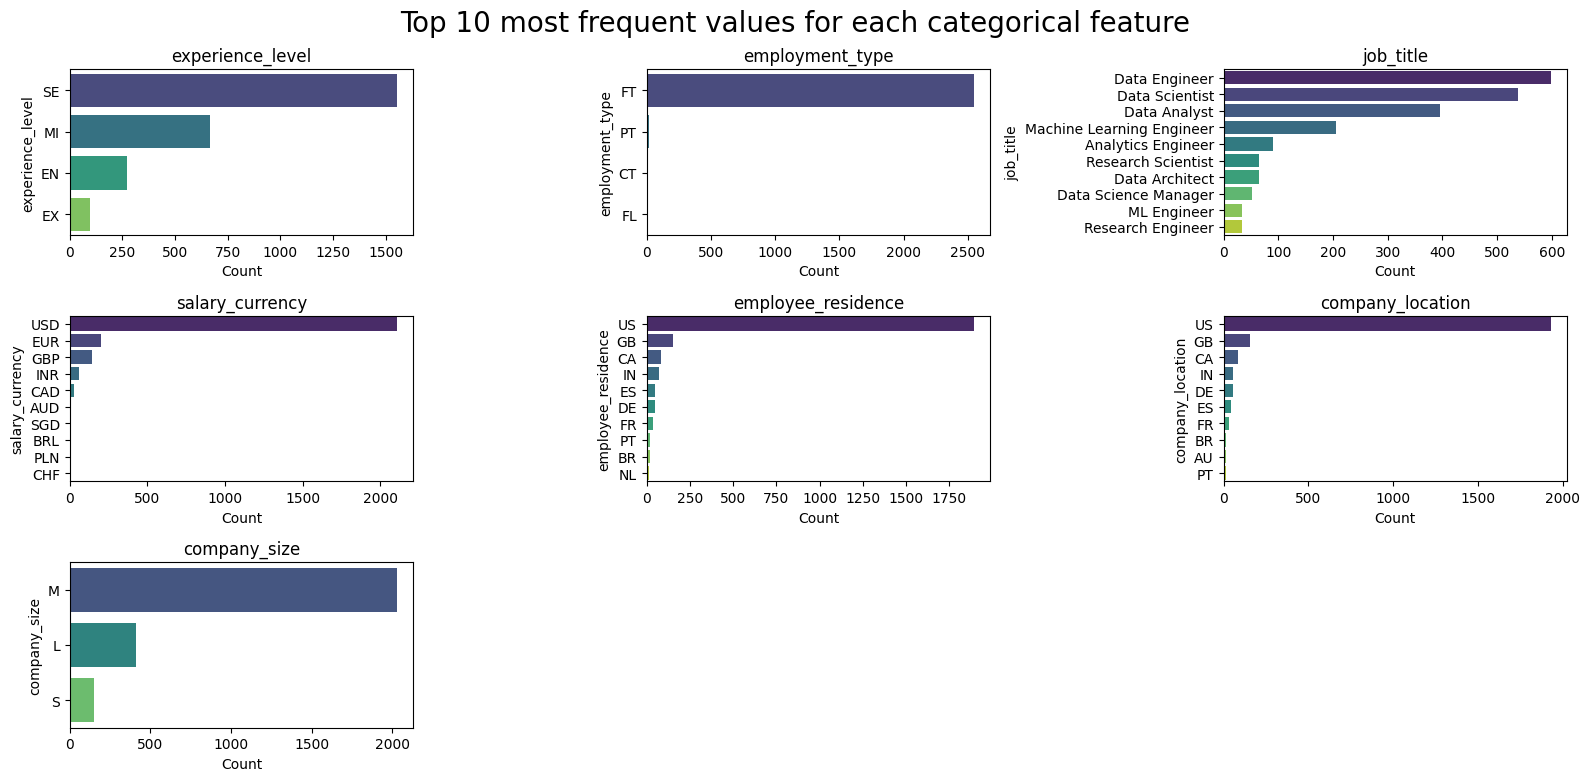

In [13]:
plt.figure(figsize=(16, 10))
plt.suptitle("Top 10 most frequent values for each categorical feature", fontsize=20)
for i, feature in enumerate(df.select_dtypes(include="object").columns):
    plt.subplot(4, 3, i+1)
    counts = df[feature].value_counts().head(10)
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title(f"{feature}")
    plt.xlabel("Count")

plt.tight_layout()
plt.show()

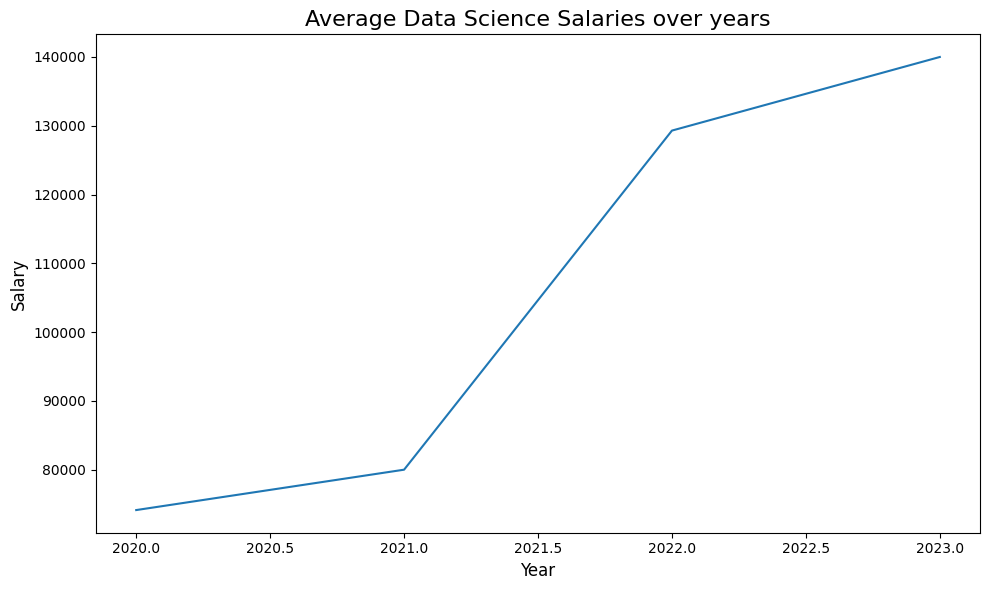

In [14]:
work_year_trends = df.groupby("work_year")[["work_year", "salary_in_usd"]].median()

plt.figure(figsize=(10, 6))
sns.lineplot(data=work_year_trends, x="work_year", y="salary_in_usd")
plt.title("Average Data Science Salaries over years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.tight_layout()
plt.show()

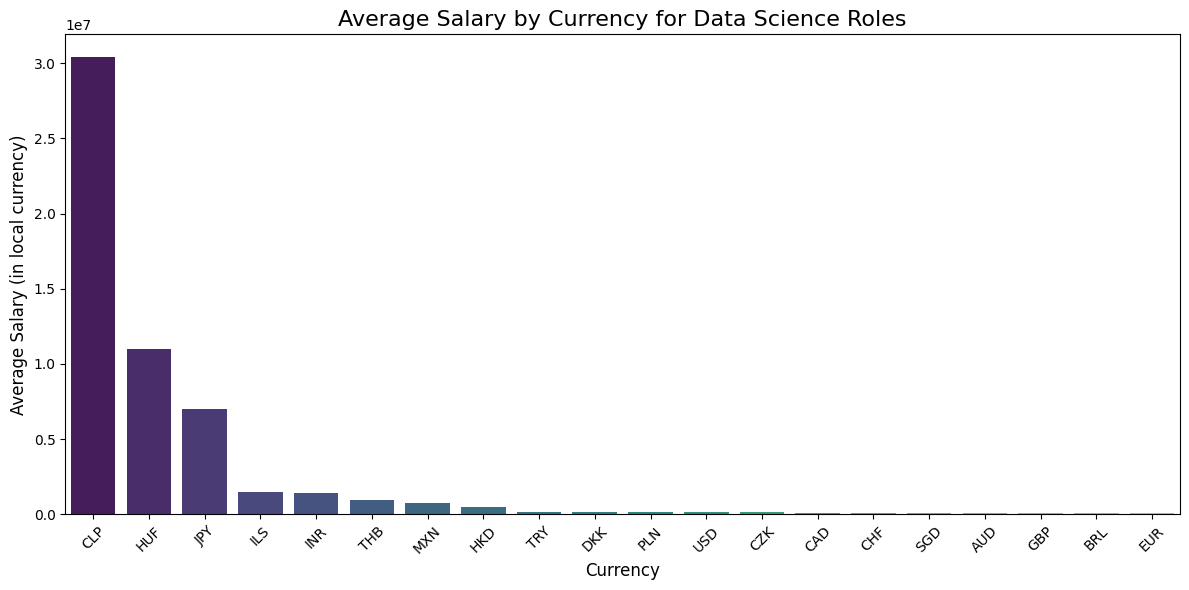

In [15]:
average_salary_by_currency = df.groupby('salary_currency')['salary'].median().reset_index()
average_salary_by_currency.columns = ['Currency', 'Average Salary']
average_salary_by_currency = average_salary_by_currency.sort_values(by='Average Salary', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=average_salary_by_currency, x='Currency', y='Average Salary', palette='viridis')
plt.title('Average Salary by Currency for Data Science Roles', fontsize=16)
plt.xlabel('Currency', fontsize=12)
plt.ylabel('Average Salary (in local currency)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

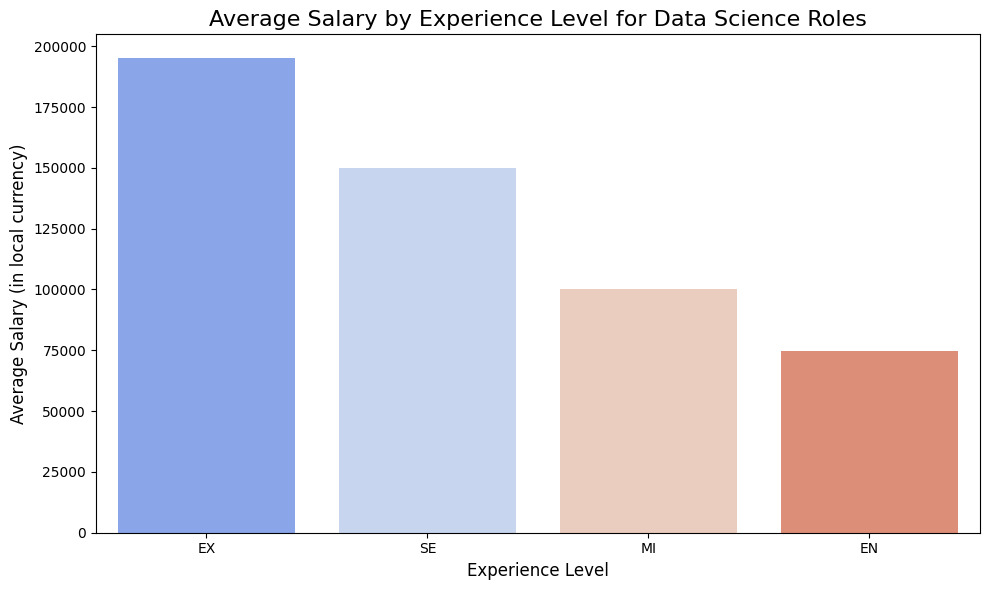

In [16]:
average_salary_by_experience = df.groupby('experience_level')['salary'].median().reset_index()
average_salary_by_experience.columns = ['Experience Level', 'Average Salary']
average_salary_by_experience = average_salary_by_experience.sort_values(by='Average Salary', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary_by_experience, x='Experience Level', y='Average Salary', palette='coolwarm')
plt.title('Average Salary by Experience Level for Data Science Roles', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary (in local currency)', fontsize=12)
plt.tight_layout()
plt.show()

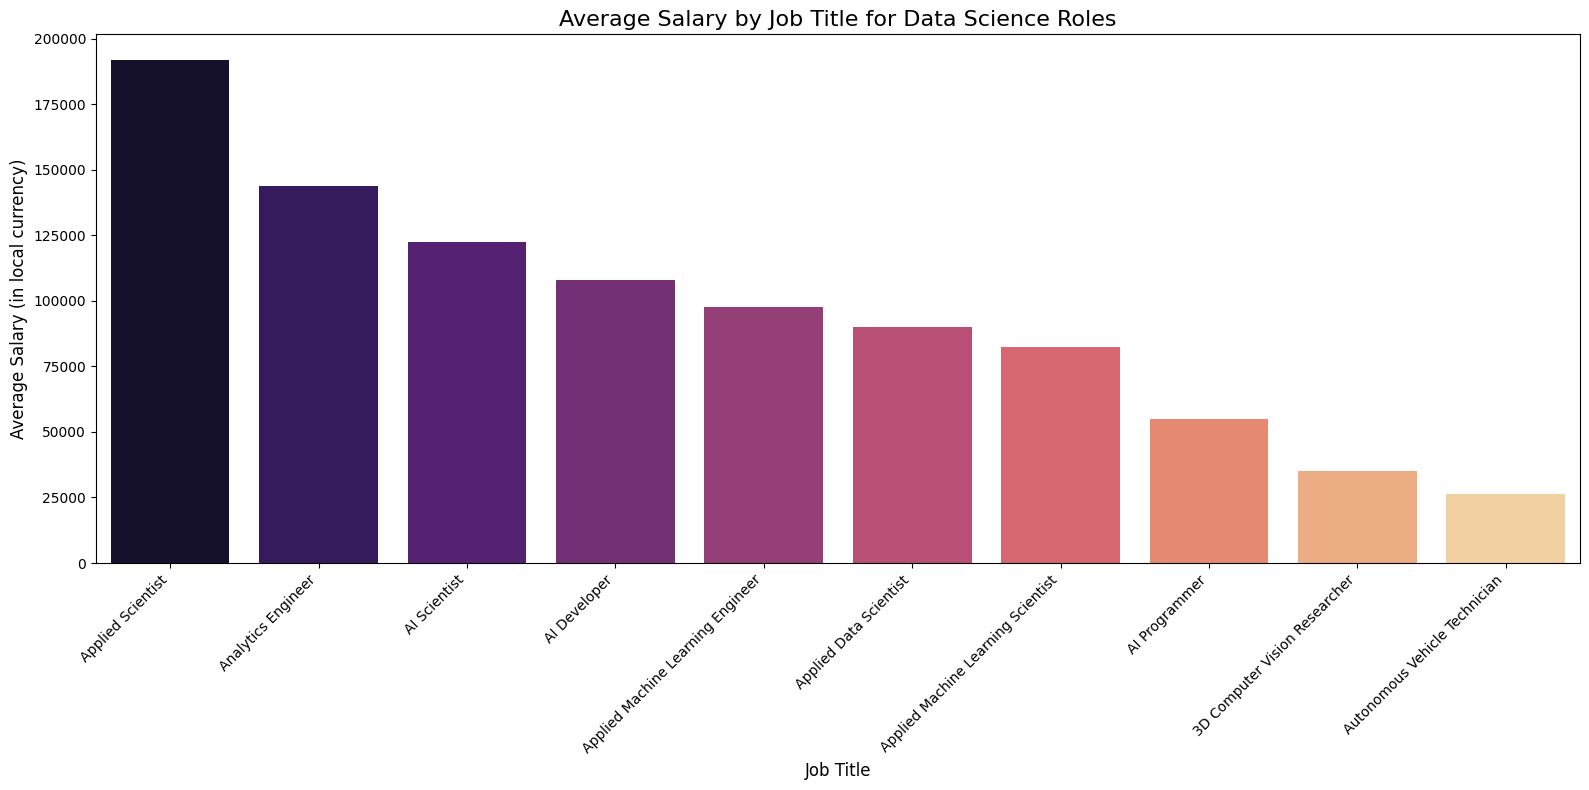

In [17]:
average_salary_by_job_title = df.groupby('job_title')['salary'].median().reset_index().head(10)
average_salary_by_job_title.columns = ['Job Title', 'Average Salary']
average_salary_by_job_title = average_salary_by_job_title.sort_values(by='Average Salary', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(data=average_salary_by_job_title, x='Job Title', y='Average Salary', palette='magma')
plt.title('Average Salary by Job Title for Data Science Roles', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Average Salary (in local currency)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

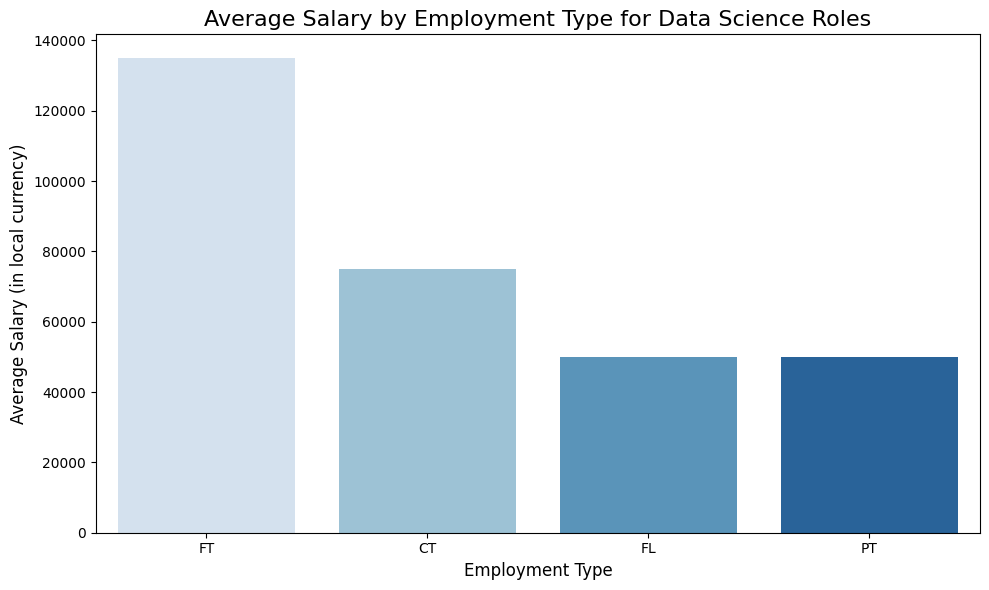

In [18]:
average_salary_by_employment_type = df.groupby('employment_type')['salary'].median().reset_index()
average_salary_by_employment_type.columns = ['Employment Type', 'Average Salary']
average_salary_by_employment_type = average_salary_by_employment_type.sort_values(by='Average Salary', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary_by_employment_type, x='Employment Type', y='Average Salary', palette='Blues')
plt.title('Average Salary by Employment Type for Data Science Roles', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary (in local currency)', fontsize=12)
plt.tight_layout()
plt.show()

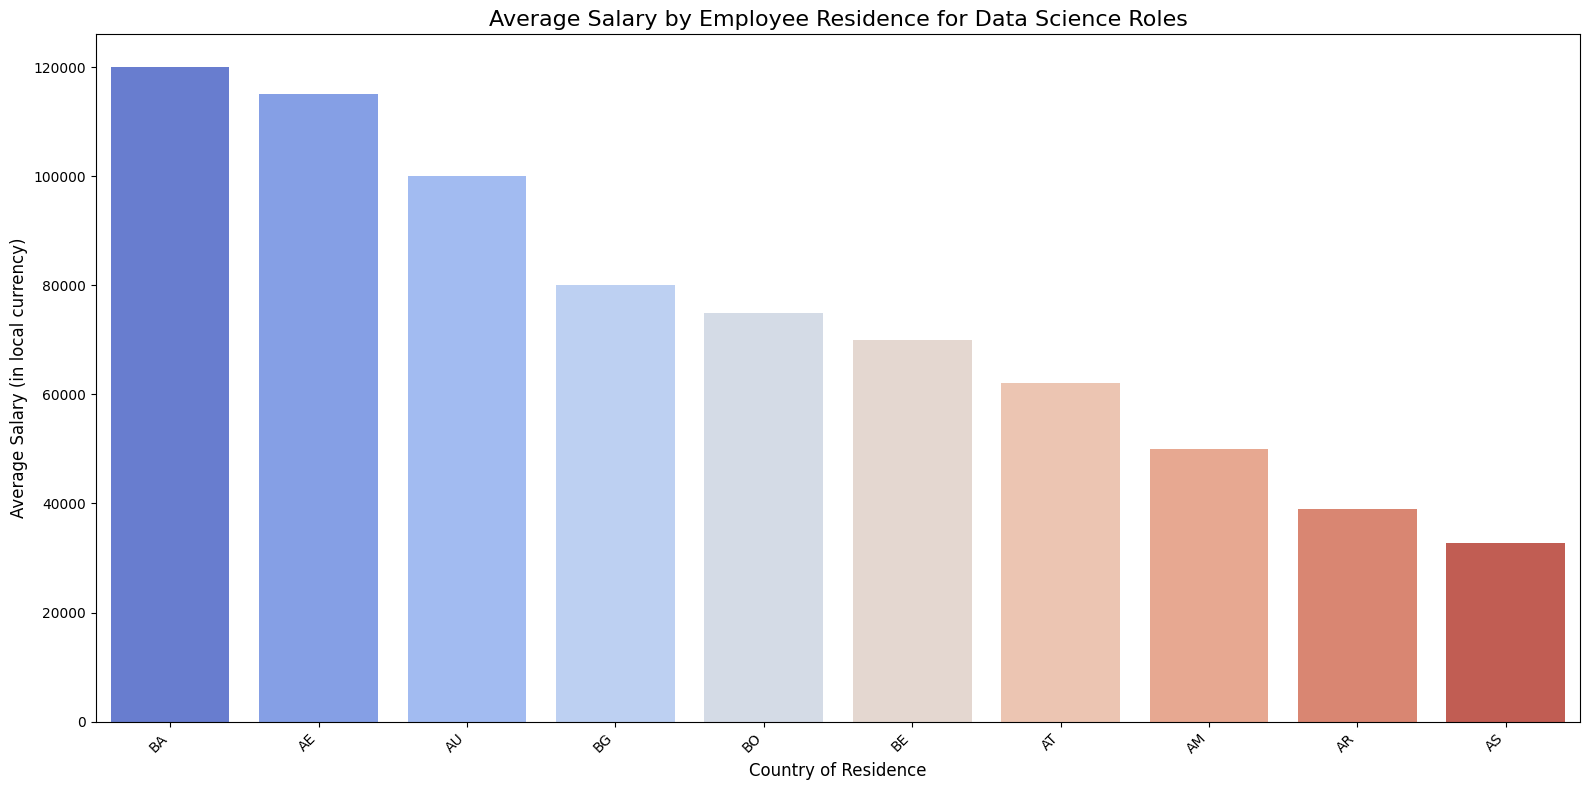

In [19]:
average_salary_by_residence = df.groupby('employee_residence')['salary'].median().reset_index().head(10)
average_salary_by_residence.columns = ['Country of Residence', 'Average Salary']
average_salary_by_residence = average_salary_by_residence.sort_values(by='Average Salary', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(data=average_salary_by_residence, x='Country of Residence', y='Average Salary', palette='coolwarm')
plt.title('Average Salary by Employee Residence for Data Science Roles', fontsize=16)
plt.xlabel('Country of Residence', fontsize=12)
plt.ylabel('Average Salary (in local currency)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

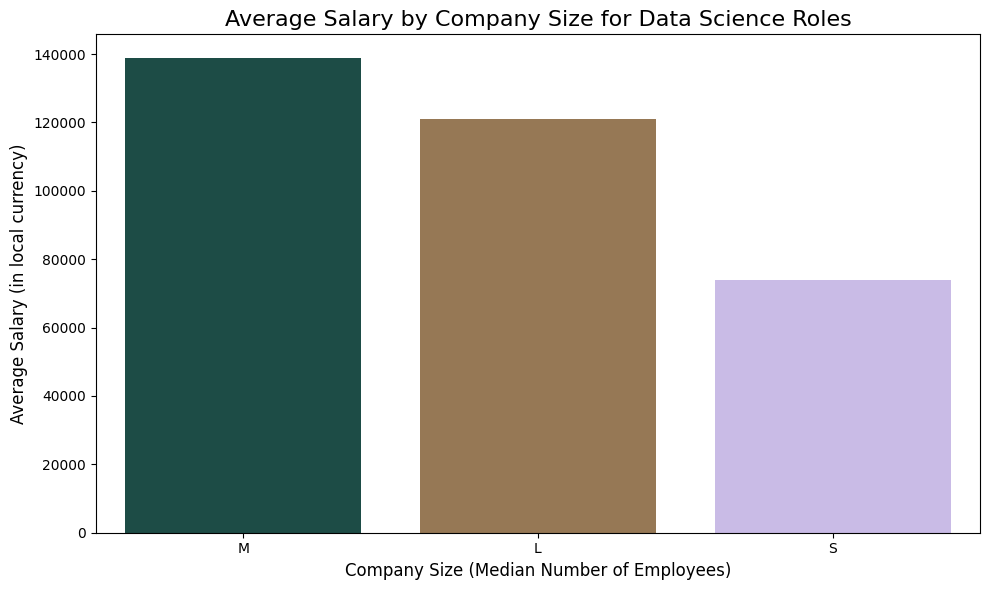

In [20]:
average_salary_by_company_size = df.groupby('company_size')['salary'].median().reset_index()
average_salary_by_company_size.columns = ['Company Size', 'Average Salary']
average_salary_by_company_size = average_salary_by_company_size.sort_values(by='Average Salary', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary_by_company_size, x='Company Size', y='Average Salary', palette='cubehelix')
plt.title('Average Salary by Company Size for Data Science Roles', fontsize=16)
plt.xlabel('Company Size (Median Number of Employees)', fontsize=12)
plt.ylabel('Average Salary (in local currency)', fontsize=12)
plt.tight_layout()
plt.show()

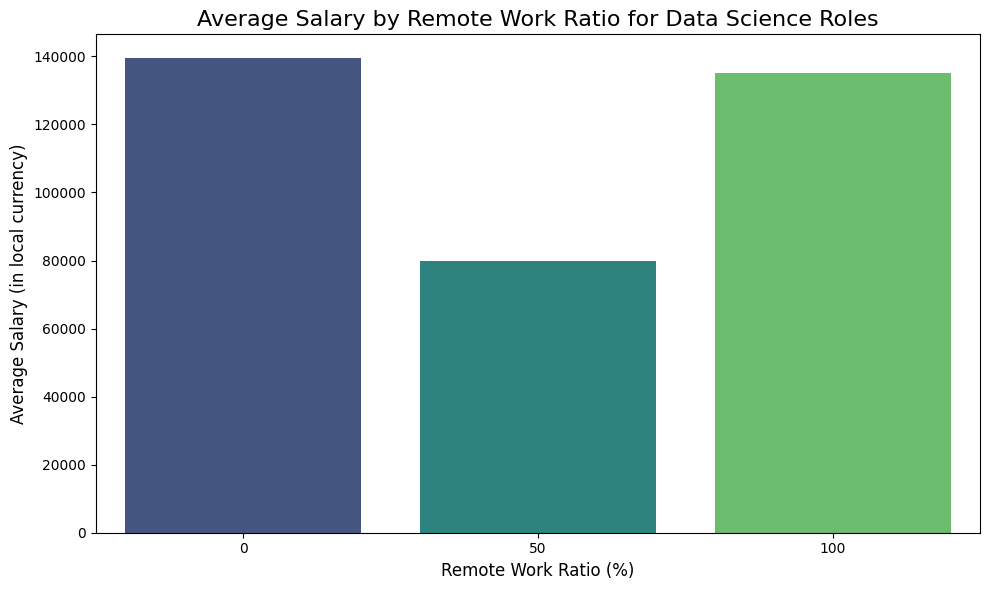

In [21]:
average_salary_by_remote_ratio = df.groupby('remote_ratio')['salary'].median().reset_index()
average_salary_by_remote_ratio.columns = ['Remote Work Ratio (%)', 'Average Salary']
average_salary_by_remote_ratio = average_salary_by_remote_ratio.sort_values(by='Remote Work Ratio (%)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary_by_remote_ratio, x='Remote Work Ratio (%)', y='Average Salary', palette='viridis')
plt.title('Average Salary by Remote Work Ratio for Data Science Roles', fontsize=16)
plt.xlabel('Remote Work Ratio (%)', fontsize=12)
plt.ylabel('Average Salary (in local currency)', fontsize=12)
plt.tight_layout()
plt.show()

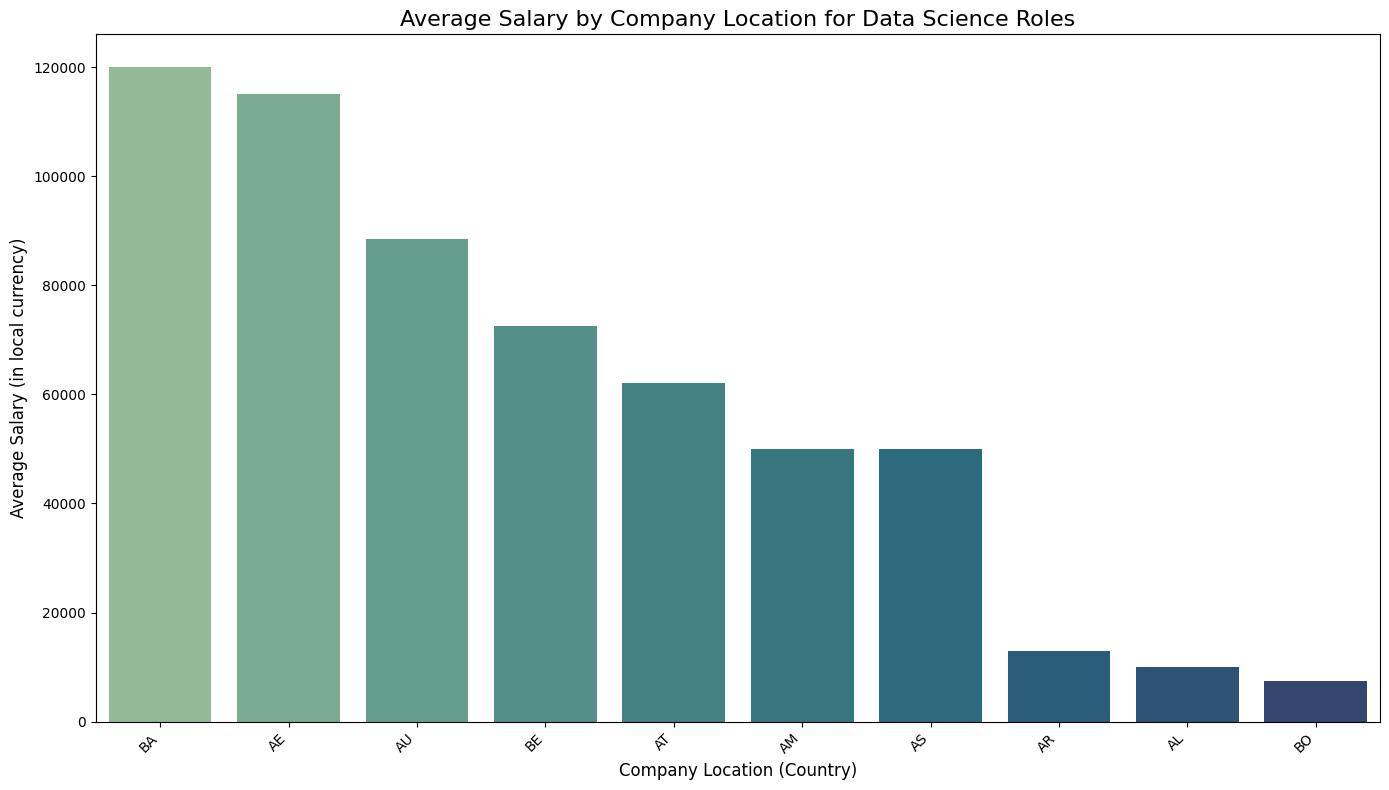

In [22]:
average_salary_by_company_location = df.groupby('company_location')['salary'].median().reset_index().head(10)
average_salary_by_company_location.columns = ['Company Location', 'Average Salary']
average_salary_by_company_location = average_salary_by_company_location.sort_values(by='Average Salary', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=average_salary_by_company_location, x='Company Location', y='Average Salary', palette='crest')
plt.title('Average Salary by Company Location for Data Science Roles', fontsize=16)
plt.xlabel('Company Location (Country)', fontsize=12)
plt.ylabel('Average Salary (in local currency)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

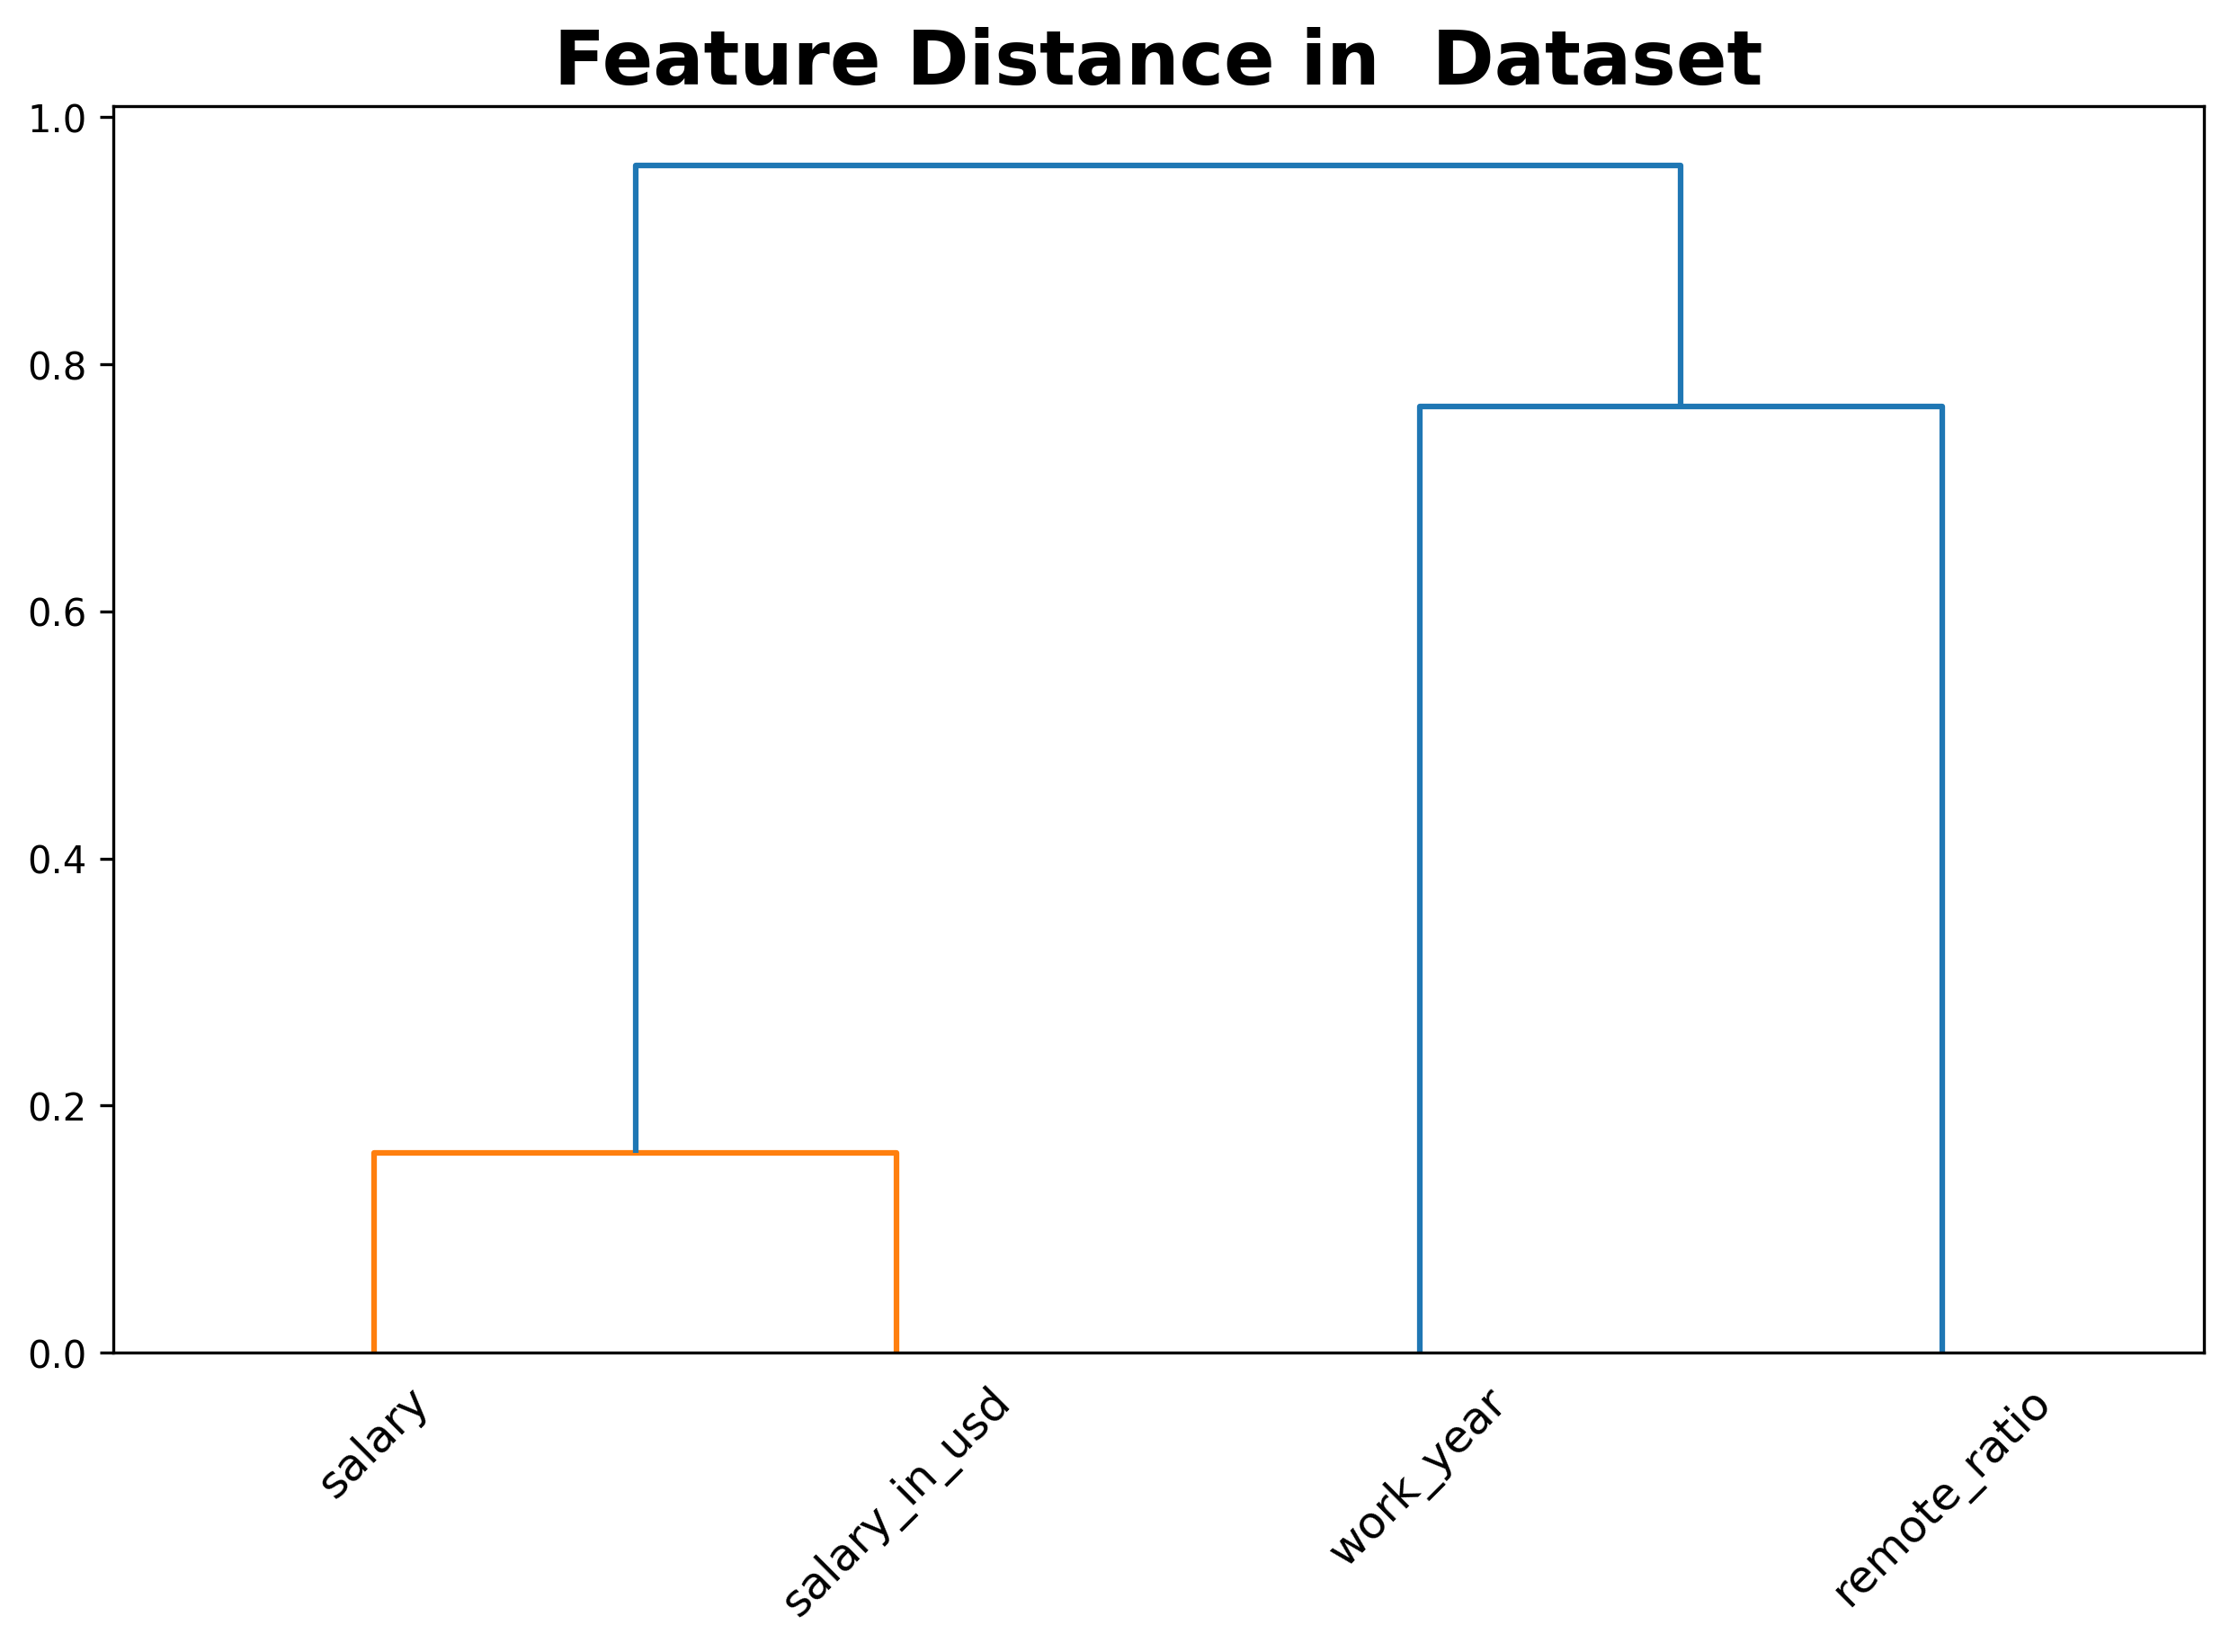

In [23]:
def distance(data, label = ''):
    corr = data.corr(method = 'spearman')
    dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')
    
    plt.figure(figsize = (10, 6), dpi = 300)
    dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=45)
    plt.title(f'Feature Distance in {label} Dataset', weight = 'bold', size = 20)
    plt.show()

distance(df.select_dtypes(include="number"))

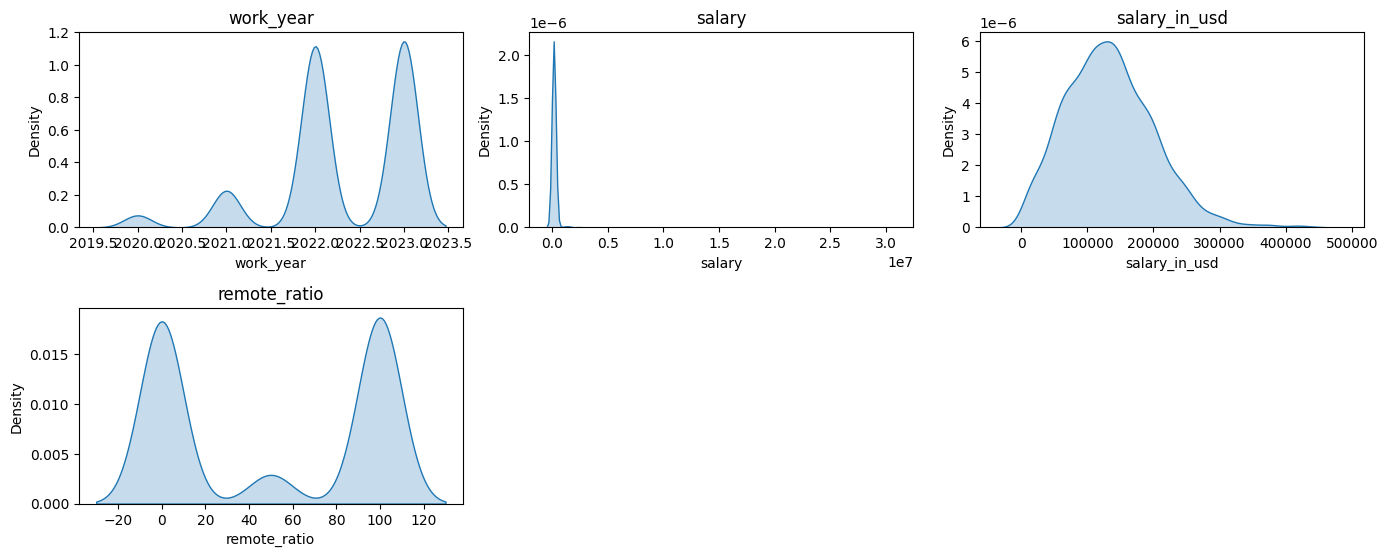

In [24]:
plt.figure(figsize=(14, 8))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df, x=feature, fill=True)
    plt.title(f"{feature}")
plt.tight_layout()
plt.show()

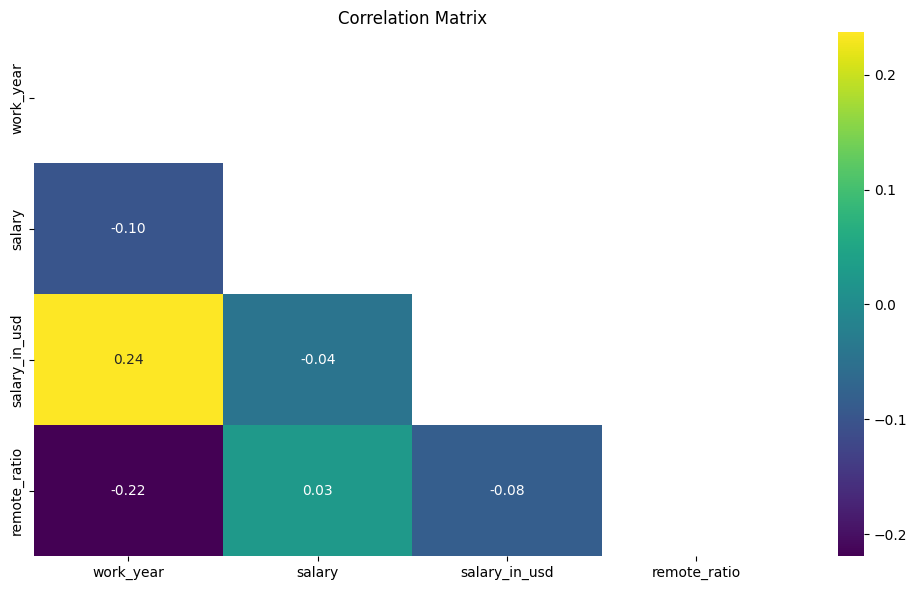

In [25]:
corr = df.select_dtypes(include="number").corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()